# Classification - KNN

In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [6]:
df.shape

(1000, 12)

In [7]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

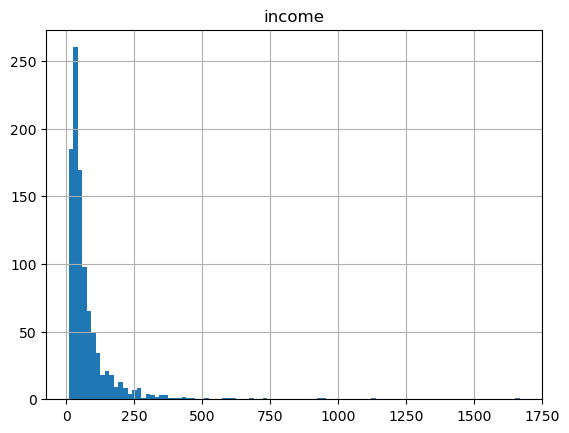

In [8]:
df.hist(column='income', bins=100)
plt.show()

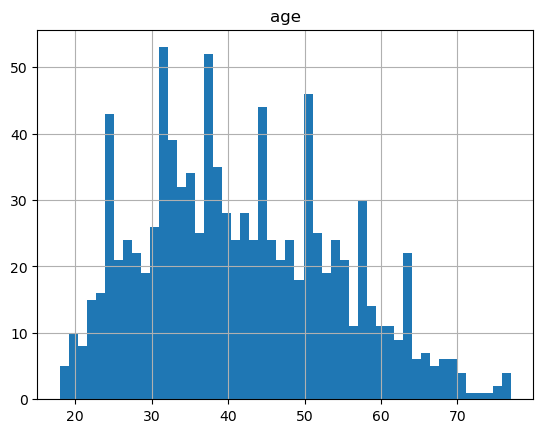

In [9]:
df.hist(column='age', bins=50)
plt.show()

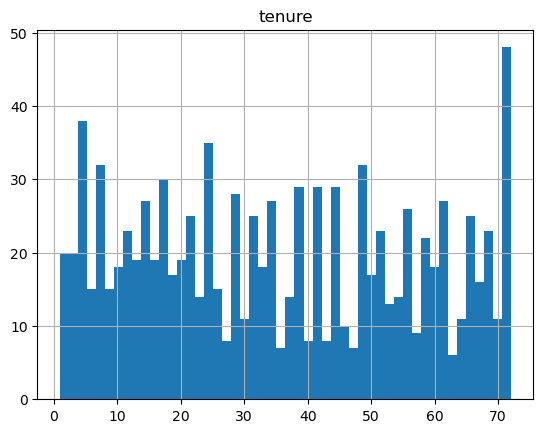

In [10]:
df.hist(column='tenure', bins=50)
plt.show()

In [11]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [12]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [13]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [14]:
X = preprocessing.StandardScaler().fit_transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [16]:
print("Trainset Size: ",X_train.shape,y_train.shape)
print("Testset Size: ",X_test.shape,y_test.shape)

Trainset Size:  (800, 11) (800,)
Testset Size:  (200, 11) (200,)


In [17]:
k=3

In [18]:
neigbhor = KNeighborsClassifier(n_neighbors=k)
neigbhor.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
yhat = neigbhor.predict(X_test)

In [20]:
yhat[0:5]

array([2, 2, 3, 3, 3], dtype=int64)

In [21]:
print('testing Accuracy:',metrics.accuracy_score(y_test,yhat))

testing Accuracy: 0.365


## Working with different values of K

In [23]:
k=4
neigbhor = KNeighborsClassifier(n_neighbors=k)
neigbhor.fit(X_train,y_train)
yhat = neigbhor.predict(X_test)
print('testing Accuracy:',metrics.accuracy_score(y_test,yhat))

testing Accuracy: 0.325


In [24]:
k=5
neigbhor = KNeighborsClassifier(n_neighbors=k)
neigbhor.fit(X_train,y_train)
yhat = neigbhor.predict(X_test)
print('Testing Accuracy:',metrics.accuracy_score(y_test,yhat))

Testing Accuracy: 0.33


In [25]:
print('Testing Jaccard Score:',metrics.jaccard_score(y_test,yhat,average='weighted'))

Testing Jaccard Score: 0.19603828795501627


## Find the best values of K

In [27]:
ks = 26
k_values = []
train_accuracy = []
test_accuracy = []

for n in range(1,ks):
    neigbhor = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = neigbhor.predict(X_test)
    k_values.append(n)
    train_accuracy.append(metrics.accuracy_score(y_train,neigbhor.predict(X_train)))
    test_accuracy.append(metrics.accuracy_score(y_test,yhat))

In [28]:
k_values

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

In [29]:
train_accuracy

[1.0,
 0.63125,
 0.575,
 0.54375,
 0.54375,
 0.5075,
 0.505,
 0.51375,
 0.50875,
 0.50125,
 0.505,
 0.5,
 0.5025,
 0.49375,
 0.47625,
 0.47375,
 0.46875,
 0.46875,
 0.455,
 0.4575,
 0.4525,
 0.445,
 0.455,
 0.4425,
 0.45]

In [30]:
test_accuracy

[0.29,
 0.34,
 0.365,
 0.325,
 0.33,
 0.33,
 0.33,
 0.335,
 0.33,
 0.35,
 0.355,
 0.345,
 0.345,
 0.375,
 0.36,
 0.355,
 0.35,
 0.39,
 0.37,
 0.355,
 0.34,
 0.355,
 0.335,
 0.345,
 0.335]

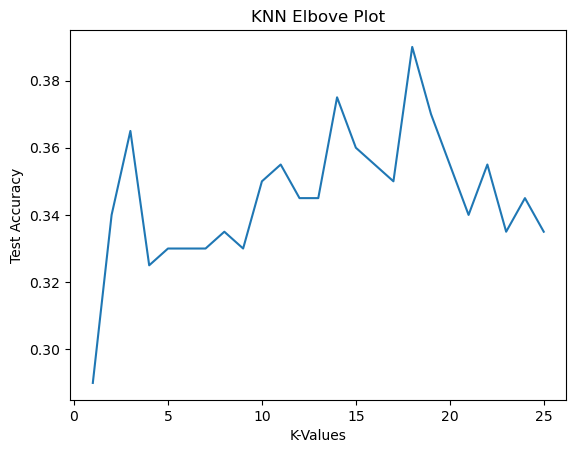

In [31]:
plt.plot(k_values, test_accuracy)
plt.title('KNN Elbove Plot')
plt.xlabel('K-Values')
plt.ylabel('Test Accuracy')
plt.show()

In [60]:
report = metrics.classification_report(y_test,yhat)
print(report)

              precision    recall  f1-score   support

           1       0.37      0.42      0.39        60
           2       0.23      0.15      0.18        39
           3       0.38      0.51      0.44        55
           4       0.24      0.17      0.20        46

    accuracy                           0.34       200
   macro avg       0.31      0.31      0.30       200
weighted avg       0.32      0.34      0.32       200

